In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_processed_data():
    """
    Load processed data with unique IDs.
    Returns:
        tuple: (X_train, y_train, train_ids, X_val, y_val, val_ids, X_test, y_test, test_ids)
    """
    # Load training data
    X_train = pd.read_csv('data/train/features/cluster_features.csv')
    y_train = np.load('data/train/labels/labels.npy')
    train_ids = np.load('data/train/ids/ids.npy')
    # Load validation data
    X_val = pd.read_csv('data/val/features/cluster_features.csv')
    y_val = np.load('data/val/labels/labels.npy')
    val_ids = np.load('data/val/ids/ids.npy')
    # Load test data
    X_test = pd.read_csv('data/test/features/cluster_features.csv')
    test_ids = np.load('data/test/ids/ids.npy')
    # Return the data
    return X_train, y_train, train_ids, X_val, y_val, val_ids, X_test, test_ids

In [3]:
# Load data
X_train, y_train, train_ids, X_val, y_val, val_ids, X_test, test_ids= load_processed_data()
X_train['type'] = y_train

In [4]:
X_train.head()

,n_clusters,max_cluster_pt,mean_cluster_pt,std_cluster_pt,max_cluster_size,mean_cluster_size,std_cluster_size,total_pt,max_cluster_eta,max_cluster_phi,mean_cluster_eta,mean_cluster_phi,cluster_pt_ratio,cluster_size_ratio,type
0,13,2.0,0.615318,0.539951,2,2.0,0.0,7.999129,0.5,0.7,0.076923,0.346154,1.470200,1.0,0.0
1,10,2.0,0.777020,0.601157,2,2.0,0.0,7.770204,0.2,0.5,0.100000,0.230000,1.430785,1.0,0.0
2,4,2.0,0.972718,0.606990,2,2.0,0.0,3.890871,0.1,0.1,0.050000,0.050000,2.557882,1.0,0.0
3,14,2.0,0.746367,0.485636,2,2.0,0.0,10.449135,0.5,0.5,0.185714,0.285714,1.624096,1.0,1.0
4,6,2.0,0.575760,0.639069,2,2.0,0.0,3.454561,0.1,0.1,0.050000,0.066667,4.988196,1.0,0.0


In [5]:
print("Dataframe size: ",X_train.shape)
print("Labels size: ",y_train.size)
print("Train IDs size: ",train_ids.size)

Dataframe size:  (3520, 15)
Labels size:  3520
Train IDs size:  3520


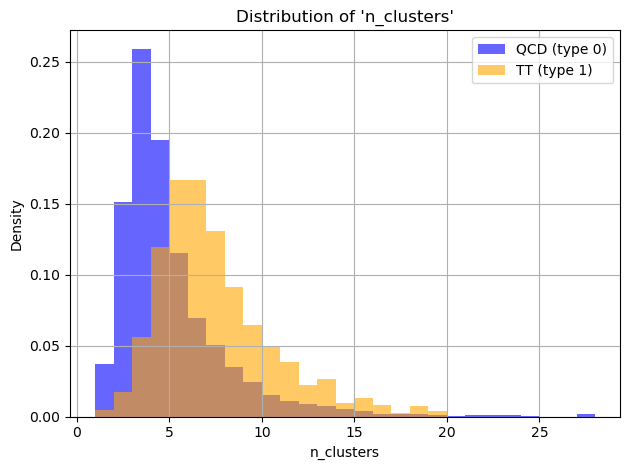

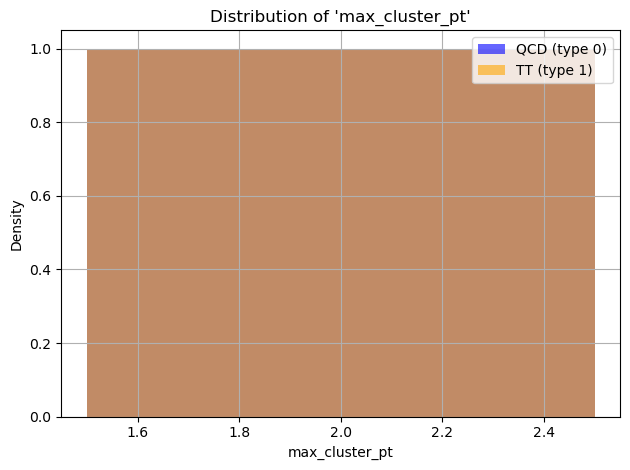

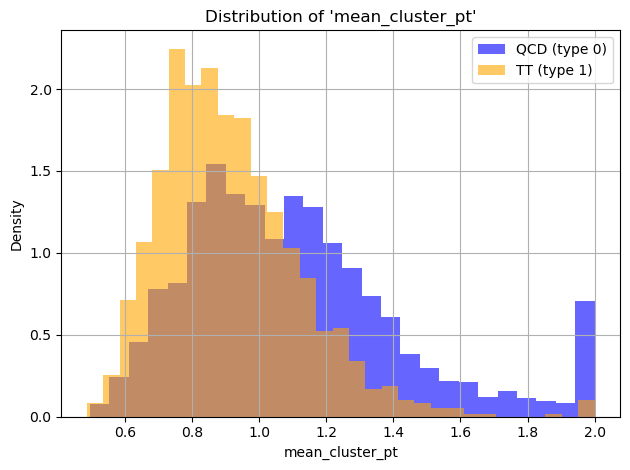

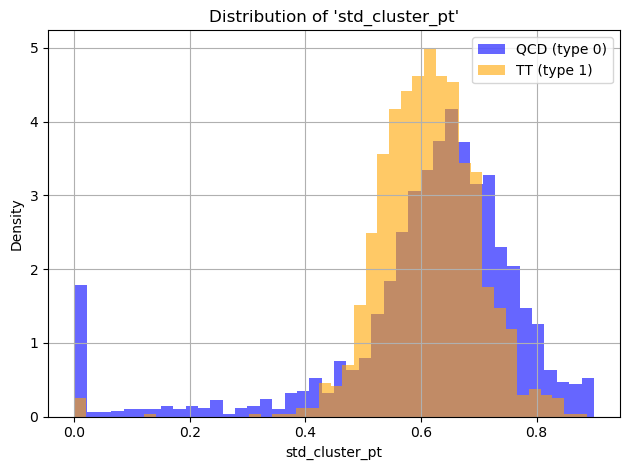

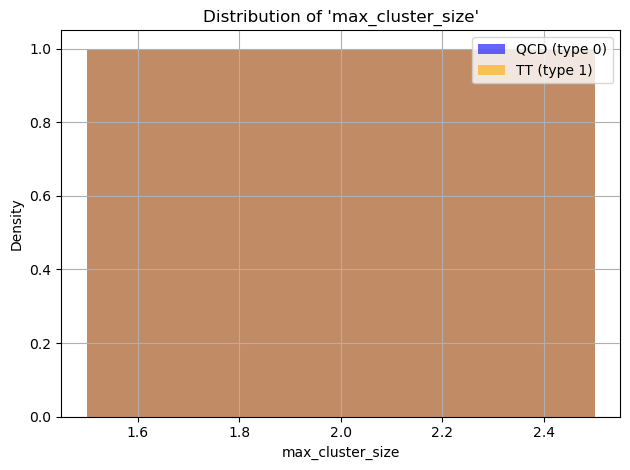

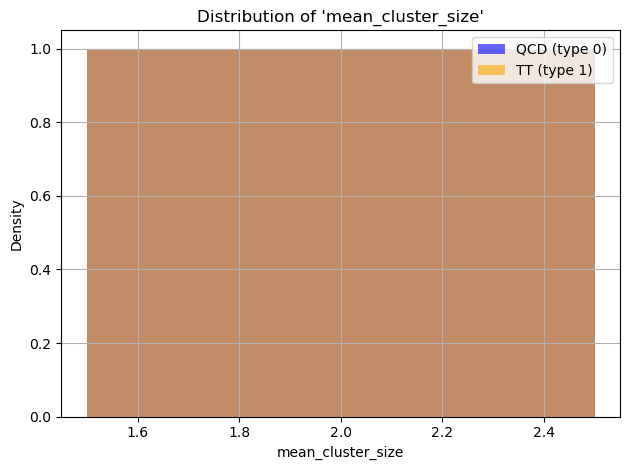

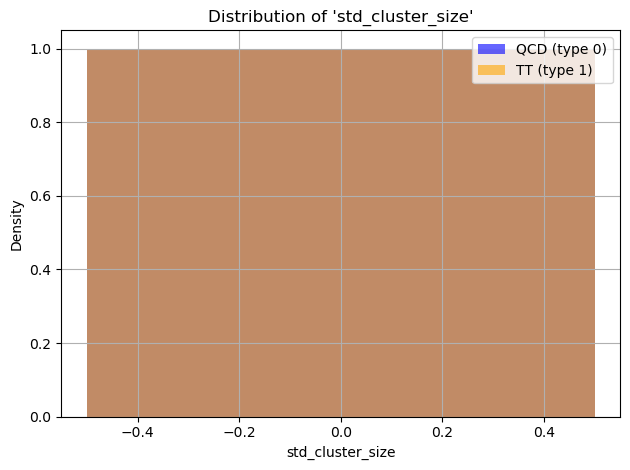

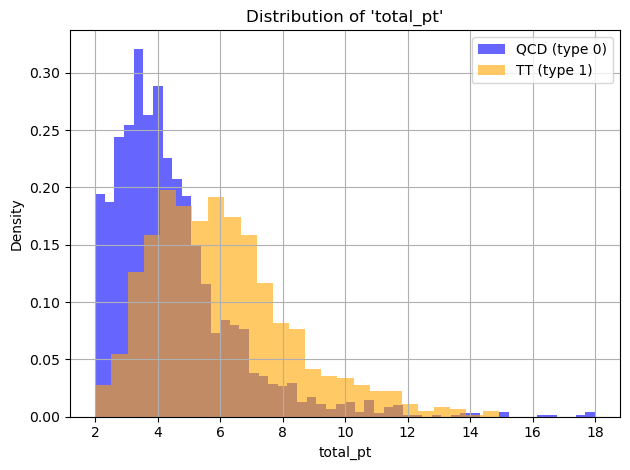

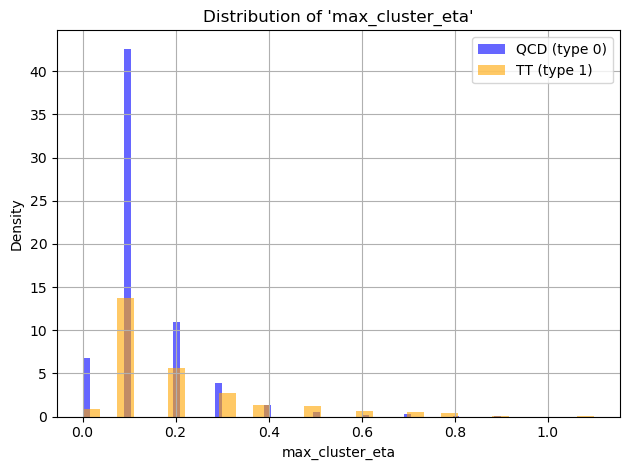

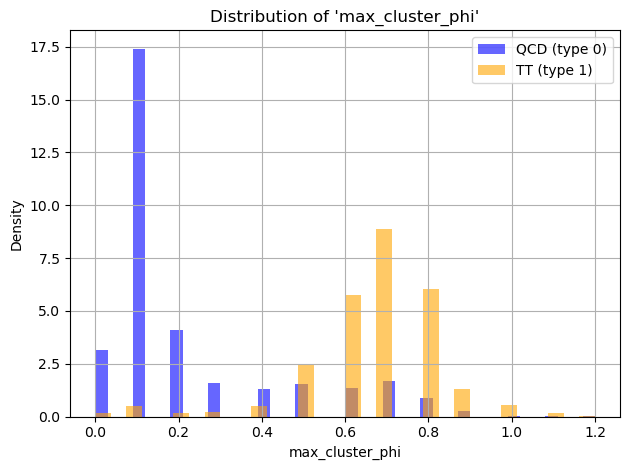

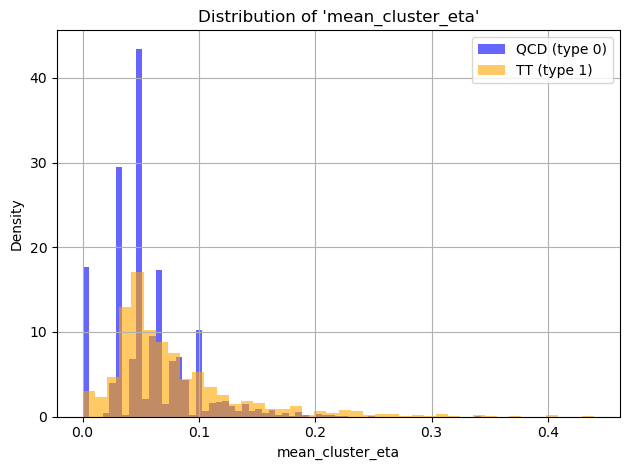

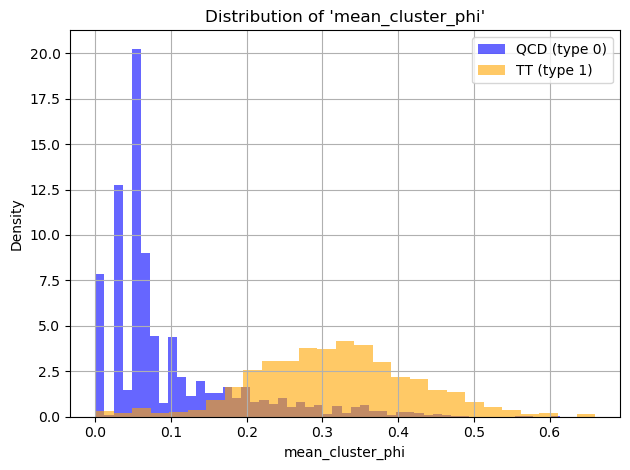

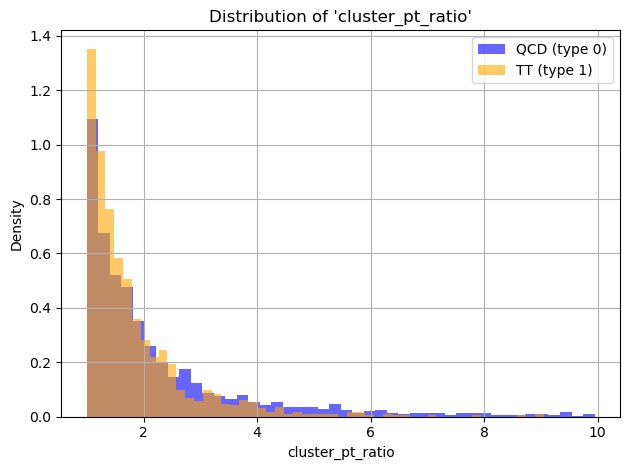

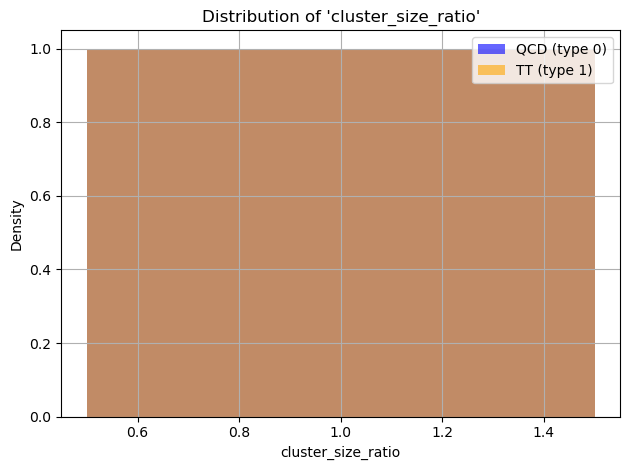

In [6]:
def plot_column(df, column_name):
    '''
    Plots a histogram for both Type 0 (QCD) and Type 1 (TT) for a given column.
    '''
    data_0 = df[df['type'] == 0][column_name]
    data_1 = df[df['type'] == 1][column_name]
    
    plt.hist(data_0, bins='auto', alpha=0.6, label='QCD (type 0)', color='blue', density=True)
    plt.hist(data_1, bins='auto', alpha=0.6, label='TT (type 1)', color='orange', density=True)

    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title(f"Distribution of '{column_name}'")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot all columns
for col in X_train.columns:
    if col != 'type':  # skip the label column if it's in X_train
        plot_column(X_train, col)